<a href="https://colab.research.google.com/github/hxf829/keras/blob/master/6_1_word_embedding_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
import matplotlib.pyplot as plt
import tensorflow.keras.optimizers as optimizers
from tensorflow.keras.utils import *

tf.__version__
keras.__version__

'2.4.0'

In [2]:
from tensorflow.keras.layers import Embedding

In [3]:
embedding_layer = Embedding(1000, 64)

In [4]:
import tensorflow.keras.datasets.imdb as imdb
from tensorflow.keras import preprocessing
max_words = 10000
maxlen = 100
(x_train, y_train), (x_test, y_test) = imdb.load_data(
    num_words=max_words)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

17465344/17464789 [==============================] - 0s 0us/step


In [5]:
len(x_train[0])

100

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
model = Sequential()
model.add(Embedding(10000, 32, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy',
             metrics=['acc'])
model.summary()
history = model.fit(x_train, y_train, 
                    epochs=30, batch_size=32, 
                    validation_split=0.2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 32)           320000    
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 3201      
Total params: 323,201
Trainable params: 323,201
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
625/625 [==============================] - 2s 3ms/step - loss: 0.5330 - acc: 0.7430 - val_loss: 0.3709 - val_acc: 0.8366
Epoch 2/30
625/625 [==============================] - 2s 3ms/step - loss: 0.2972 - acc: 0.8769 - val_loss: 0.3285 - val_acc: 0.8562
Epoch 3/30
625/625 [==============================] - 2s 3ms/step - loss: 0.2321 - acc: 0.9069 - val_loss: 0.3310 - 

In [7]:
history.history

{'acc': [0.7429500222206116,
  0.8768500089645386,
  0.9068999886512756,
  0.9291999936103821,
  0.9513000249862671,
  0.9691500067710876,
  0.9829000234603882,
  0.9923999905586243,
  0.9968000054359436,
  0.9987499713897705,
  0.9995499849319458,
  0.9995999932289124,
  0.9998000264167786,
  0.9998999834060669,
  0.9998999834060669,
  0.9999499917030334,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [0.5329963564872742,
  0.29716625809669495,
  0.2321140319108963,
  0.1858804076910019,
  0.1412935107946396,
  0.09970460832118988,
  0.06457670032978058,
  0.038604214787483215,
  0.02120722271502018,
  0.010792842134833336,
  0.0052018724381923676,
  0.0025652276817709208,
  0.0012472775997593999,
  0.0005938942194916308,
  0.000418085721321404,
  0.00013952846347820014,
  5.795844117528759e-05,
  2.573458550614305e-05,
  3.121709596598521e-05,
  1.3453558494802564e-05,
  8.148392225848511e-06,
  1.9968406377302017e-06,
  4.

In [22]:
?plt

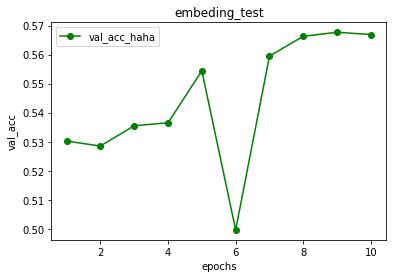

In [23]:
val_acc = history.history['val_acc']
epochs = range(1, len(val_acc)+1)
#可使用axis设定坐标轴取值范围
#plt.axis
plt.plot(epochs, val_acc, 'bo-', color='green', label='val_acc_haha')
plt.xlabel('epochs')
plt.ylabel('val_acc')
plt.legend()
plt.title('embeding_test')
plt.show()

In [9]:
val_acc

[0.8366000056266785,
 0.8561999797821045,
 0.857200026512146,
 0.8543999791145325,
 0.8555999994277954,
 0.8529999852180481,
 0.8496000170707703,
 0.8416000008583069,
 0.8456000089645386,
 0.8416000008583069,
 0.8407999873161316,
 0.8414000272750854,
 0.8378000259399414,
 0.8378000259399414,
 0.8389999866485596,
 0.8360000252723694,
 0.8345999717712402,
 0.8356000185012817,
 0.8361999988555908,
 0.8370000123977661,
 0.8360000252723694,
 0.8361999988555908,
 0.8366000056266785,
 0.8345999717712402,
 0.8356000185012817,
 0.8349999785423279,
 0.8352000117301941,
 0.8349999785423279,
 0.8349999785423279,
 0.8352000117301941]

In [10]:
!wget http://ai.stanford.edu/\~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar zxf aclImdb_v1.tar.gz
!mv aclImdb imdb
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip -d glove

--2020-08-26 15:23:52--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  33.0MB/s    in 2.4s    

2020-08-26 15:23:55 (33.0 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]

--2020-08-26 15:24:02--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-08-26 15:24:02--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP reque

In [11]:
import os
imdb_dir = '/content/imdb'
train_dir = os.path.join(imdb_dir, 'train')
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [12]:
len(texts)
texts[0]

'What was Franco Zeffirelli thinking? Was Hollywood responsible for this travesty, or can I take comfort in the idea that someone who didn\'t speak English as a first language just completely missed the point of Charlotte Bronte\'s classic? I don\'t think I can improve on a comment I read below, so I\'ll just paraphrase it: "Jane Eyre is a great great book, the screenwriter should read it sometime." It\'s true that this movie\'s two leads were sadly miscast. But pity the actors, because the screenwriter left out all of the best scenes. The dialog that makes you understand the Jane and Rochester have a meeting of minds and a shared sense of fun...deleted from the script. The marriage proposal, the fortune teller...gone. The allusions, half joking, half sincerely felt, to Jane as a fairy sprite from olde England come to rescue Rochester in his despair...eliminated.<br /><br />It is unfortunate that Zeffirelli felt the need to completely rewrite the end of the novel and Jane\'s interactio

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 100 #截取前100个词
training_samples = 200 
validation_samples = 10000
max_words = 20000 #只考虑topx的词汇
#初始化token分析器
tokenizer = Tokenizer(num_words = max_words)
#分析文本数组
tokenizer.fit_on_texts(texts)
#将文本数组转化为word_index序列
sequences = tokenizer.texts_to_sequences(texts)

In [14]:
word_index = tokenizer.word_index
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_test = data[training_samples:training_samples+validation_samples]
y_test = labels[training_samples:training_samples+validation_samples]


In [15]:
glove_dir='/content/glove'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [16]:
len(embeddings_index)

400000

In [17]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [18]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.038194  , -0.24487001,  0.72812003, ..., -0.1459    ,
         0.82779998,  0.27061999],
       [-0.071953  ,  0.23127   ,  0.023731  , ..., -0.71894997,
         0.86894   ,  0.19539   ],
       ...,
       [-0.44376999,  0.03826   ,  0.20826   , ..., -0.51973999,
        -0.87071002,  0.28297001],
       [-0.090716  ,  0.39684001, -0.24558   , ..., -0.9386    ,
         0.43085   , -0.24685   ],
       [ 0.050756  , -0.91547   , -0.54949999, ...,  0.59113997,
        -0.32069001,  0.34022999]])

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='selu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          2000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,320,065
Trainable params: 2,320,065
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
20/20 [==============================] - 1s 60ms/step - loss: 1.6109 - acc: 0.5200 - val_loss: 0.6931 - val_acc: 0.5302
Epoch 2/10
20/20 [==============================] - 1s 55ms/step - loss: 0.6041 - acc: 0.7050 - val_loss: 0.7246 - val_acc: 0.5285
Epoch 3/10
20/20 [==============================] - 1s 56ms/step - loss: 0.4729 - acc: 0.7800 - val_loss: 0.7829 - val_acc: 0.5355
Epoch 4/10
20/20 [==============================] - 1s 54ms/step - loss: 0.1993 - acc: 0.9350 - val_loss: 0.8708 - val_acc: 0.5365
Epoch 5/10
20/20 [==============================] - 1s 55ms/step - loss: 0.0601 - acc: 0.9900 - val_loss: 0.8785 - val_acc: 0.5544
Epoch 6/10
20/20 [==============================] - 1s 55ms/step - loss: 0.0654 - acc: 0.9650 - val_loss: 4.6627 - val_acc: 0.4996
Epoch 7/10
20/20 [==============================] - 1s 53ms/step - loss: 0.0852 - acc: 0.9700 - val_loss: 0.9587 - val_acc: 0.5595
Epoch 8/10
20/20 [==============================] - 1s 54ms/step - loss: 0.2234 - a

In [24]:
model.save_weights(os.path.join(
    '/content/',
    'pre_trained_glove_model.h5'))

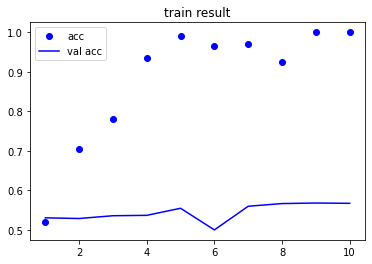

In [25]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='acc')
plt.plot(epochs, val_acc, 'b', label='val acc')
plt.title('train result')
plt.legend()
plt.show()

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_test, y_test))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          2000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 2,320,065
Trainable params: 2,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 1s 93ms/step - loss: 0.6950 - acc: 0.4950 - val_loss: 0.6915 - val_acc: 0.5160
Epoch 2/10
7/7 [==============================] - 1s 79ms/step - loss: 0.5211 - acc: 0.9750 - val_loss: 0.6925 - 

In [28]:
model.load_weights('/content/pre_trained_glove_model.h5')

In [29]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9941 - acc: 0.5503


[0.9940569400787354, 0.5503000020980835]